Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.fft import fft, ifft
import pickle

from kpz import *
from inverse import *

In [2]:
x_bounds = np.array([100, 250])
t_bounds = np.array([10, 42])
# t_bounds = np.array([10, 13])

Load data

In [3]:
filename = 'spread.pkl'
with open(filename, 'rb') as f:
    spread = pickle.load(f)
spread = np.array(spread)
y_bounds = np.array([0, spread.max()])

Run single simulation

In [4]:
h0, h1, verifyh, ha_result, y_bounds, finals, errs = runExperiment(spread, t_bounds[0], t_bounds[1], np.array([50], int), x_bounds, y_bounds)
ha_result

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1404.8822872203634
        x: [ 1.000e+00  1.000e+00  1.000e+00]
      nit: 1
      jac: [-2.883e+09 -2.090e+09 -3.277e+09]
 hess_inv: [[ 1.088e+00  1.013e-01  1.365e-01]
            [ 1.013e-01  4.523e-01 -4.885e-01]
            [ 1.365e-01 -4.885e-01  5.843e-01]]
     nfev: 81
     njev: 19

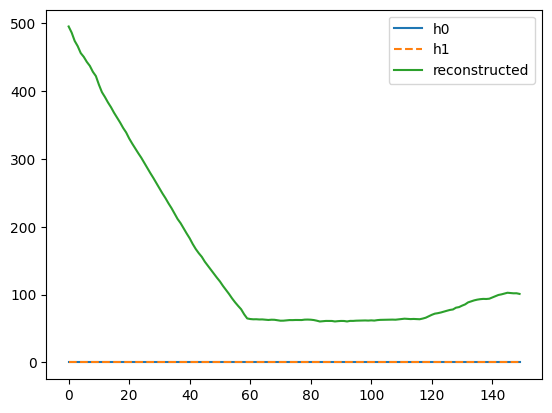

In [5]:
x = np.arange(len(h0)).astype(float)
plt.plot(x, h0, label='h0')
plt.plot(x, h1, '--', label='h1')
# plt.plot(x, verifyh[0], label='original')
plt.plot(x, finals[0].y[:, -1], label='reconstructed')
# plt.ylim(0, 1)
plt.legend()

In [6]:
finals[0].y[:, -1]

array([494.92977925, 485.85454888, 473.61346518, 465.8871727 ,
       455.71708913, 450.16456825, 442.79495564, 436.92110703,
       428.20937554, 421.87821952, 409.23265721, 398.16278016,
       390.95333646, 382.9979414 , 375.96840715, 367.86372055,
       360.67459645, 353.48967863, 345.54917462, 338.84337867,
       329.99727667, 322.44131592, 315.31833882, 308.30423381,
       301.61194316, 293.94547138, 286.42400945, 278.9240428 ,
       271.75170953, 264.02702277, 256.5813984 , 249.00541998,
       242.04462106, 234.35751003, 227.28849825, 219.31521187,
       211.35106436, 205.16826779, 197.4657167 , 190.01775804,
       182.89099525, 174.47478292, 167.13682743, 160.97566961,
       155.61739356, 148.43738296, 142.53490624, 136.68656505,
       130.96303711, 124.84164948, 119.33280202, 112.74911198,
       106.84220575, 100.92811079,  94.44951724,  88.60887394,
        83.35779958,  78.3921424 ,  70.93868704,  64.88535337,
        64.00077596,  63.60082894,  63.68198572,  63.35

basically, investigating what's wrong with the KPZ equation and what it's failing to capture. if c v lamb don't capture much if any useful information about the spread, then the model isn't so good and i'll need a new equation

markov chain mc model for c v lamb